![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning

### Portfolio uchun vazifa: Toshkent shahrida uylarning narxini aniqlash.

Ushbu amaliyotda sizning vazifangiz berilgan ma`lumotlar asosida Toshkent shahridagi uylarning narxini aniqlash.

In [101]:
import pandas as pd
import numpy as np
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(20,6)})

raw_data = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
raw_data.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy joylashgan qavat
- `max_levels` - ja'mi qavatlar soni
- `price` - uy narxi

## Vazifani CRSIP-DM Metolodgiyasi yordamida bajaring.
<img src="https://i.imgur.com/dzZnnYi.png" alt="CRISP-DM" width="800"/>

In [102]:
raw_data.shape

(7565, 7)

In [103]:
raw_data.describe(include= 'all')

,location,district,rooms,size,level,max_levels,price
count,7565,7565,7565.000000,7565,7565.000000,7565.000000,7565
unique,1600,12,NaN,407,NaN,NaN,717
top,"город Ташкент, Чиланзарский район, Чиланзар",Чиланзарский,NaN,60,NaN,NaN,35000
freq,112,1641,NaN,379,NaN,NaN,158
mean,NaN,NaN,2.625644,NaN,3.699273,6.038202,NaN
std,NaN,NaN,1.085201,NaN,2.237275,2.613271,NaN
min,NaN,NaN,1.000000,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,2.000000,NaN,2.000000,4.000000,NaN
50%,NaN,NaN,3.000000,NaN,3.000000,5.000000,NaN
75%,NaN,NaN,3.000000,NaN,5.000000,9.000000,NaN


In [104]:
raw_data.dtypes

location      object
district      object
rooms          int64
size          object
level          int64
max_levels     int64
price         object
dtype: object

# Malumotlarga ishlov berishni boshlaymiz

## Dastavval 'location' ustunni alohida DataFrame sifatida tahlil qilib ko'ramiz ma'nili malumotlar guruhinni aniqlasak asosiy DataFrame ga merge qilamiz aks holda ushbu ustunni tashlab yuboramiz

In [105]:
rd_location = raw_data[['location']]
rd_location

,location
0,"город Ташкент, Юнусабадский район, Юнусабад 8-..."
1,"город Ташкент, Яккасарайский район, 1-й тупик ..."
2,"город Ташкент, Чиланзарский район, Чиланзар 2-..."
3,"город Ташкент, Чиланзарский район, Чиланзар 9-..."
4,"город Ташкент, Чиланзарский район, площадь Актепа"
...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа..."
7561,"город Ташкент, Яшнободский район, 1-й проезд А..."
7562,"город Ташкент, Шайхантахурский район, Зульфиях..."
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И..."


In [106]:
[x.split(',') for x in rd_location.location]
df_loc = pd.DataFrame([x.split(',') for x in rd_location.location])

### Birinchi ustunni unikal qiymatlarini tekshiramiz va agar faqat Toshkent shahri bo'lsa tashlab yuboramiz

In [107]:
df_loc[0].unique()

array(['город Ташкент'], dtype=object)

In [108]:
df_loc.drop(0, axis=1, inplace=True)
df_loc.head()

,1,2,3,4,5
0,Юнусабадский район,Юнусабад 8-й квартал,None,None,None
1,Яккасарайский район,1-й тупик Шота Руставели,None,None,None
2,Чиланзарский район,Чиланзар 2-й квартал,None,None,None
3,Чиланзарский район,Чиланзар 9-й квартал,None,None,None
4,Чиланзарский район,площадь Актепа,None,None,None


In [109]:
df_loc.isna().sum()

1       0
2      30
3    7509
4    7552
5    7564
dtype: int64

### 3, 4, 5 ustunlarda xaddan tashqari Null qiymatlar bo'lganligi sababli tashlab yuboramiz

In [110]:
df_loc.drop(labels=[3,4,5], axis=1, inplace=True)

### 2 ustunni qaraymiz

In [111]:
len(df_loc[2].unique())

1502

### Bizda 1502 ta unikalni obyekt mavjud va buni tug'irlab analiz qilish juda murakkab shuning uchun bu ustunni ham tashlab yuboramiz. Hamda 1 chi ustunni qoldirgan holatda uni asl Datamizdagi 'district' ustuni bilan tekshiramiz sababi xato tuman belgilanga bulishi mumkin yoki yo'q tekshirish.

In [112]:
df_loc.drop(2, axis=1, inplace= True)

In [113]:
df_loc_distr = pd.DataFrame([x.split(' ')[1] for x in df_loc[1]])

In [114]:
df_loc_distr.columns = ['district']

In [115]:
check = pd.DataFrame([df_loc_distr.iat[i,0] == raw_data.iat[i,1] for i in raw_data.index])

In [116]:
check.value_counts()

True    7565
dtype: int64

### Barcha qiymatlar True yani Toshkent shahirini tumanlari tug'ri yozilgan. Shunday ekan asl datadagi  'location' ustunni tashlab yuborsak bo'ladi, sababi ma'nili malumot topilmadi.

In [117]:
raw_data.drop('location', axis=1, inplace=True)

In [118]:
raw_data

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57,4,4,52000
1,Яккасарайский,2,52,4,5,56000
2,Чиланзарский,2,42,4,4,37000
3,Чиланзарский,3,65,1,4,49500
4,Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...
7560,Яшнободский,1,38,5,5,24500
7561,Яшнободский,2,49,1,4,32000
7562,Шайхантахурский,2,64,3,9,40000
7563,Мирзо-Улугбекский,1,18,1,4,11000


In [119]:
len(raw_data.district.unique())

12

In [120]:
raw_data.district.value_counts()

Чиланзарский         1641
Мирзо-Улугбекский    1382
Юнусабадский          883
Учтепинский           880
Мирабадский           773
Яккасарайский         658
Яшнободский           484
Шайхантахурский       396
Олмазорский           269
Сергелийский          175
Янгихаётский           16
Бектемирский            8
Name: district, dtype: int64

### Numeric lekin Object typa o'tib qolgan ustunlarni dtype ni o'zgartiramiz

In [121]:
raw_data.dtypes

district      object
rooms          int64
size          object
level          int64
max_levels     int64
price         object
dtype: object

In [122]:
raw_data = raw_data.astype({"size": float, "price": float})

ValueError: could not convert string to float: 'Площадьземли:1сот'

### Demak bizda Quyidagi ustunlarda noodatiy qiymatlar bor ularni to'g'irlab chiqamiz yoki tashlab yuboramiz

In [123]:
idx_s = raw_data[raw_data['size'] == 'Площадьземли:1сот'].index
idx_s

Int64Index([5347], dtype='int64')

In [124]:
raw_data.drop(idx_s, axis=0, inplace= True)

In [125]:
raw_data = raw_data.astype({"size": float, "price": float})

ValueError: could not convert string to float: 'Договорная'

In [126]:
idx_p = raw_data[raw_data['price'] == 'Договорная'].index
idx_p.size

99

In [127]:
idx_p.size / raw_data.shape[0] * 100

1.3088313061872026

### Jami shunday qiymatlar 1.3% ni tashkil qilayotganligi uchun hamda bu predict qilinadigan ustun bo'lgani uchun uni fill qilmadi sababi fill qilinga ustunni predict qilishga to'g'ri keladi

In [128]:
raw_data.drop(idx_p, axis=0, inplace= True)

In [129]:
raw_data = raw_data.astype({"size": float, "price": float})

In [130]:
raw_data.dtypes

district       object
rooms           int64
size          float64
level           int64
max_levels      int64
price         float64
dtype: object

In [131]:
raw_data.describe(include= 'all')

,district,rooms,size,level,max_levels,price
count,7465,7465.000000,7465.000000,7465.000000,7465.000000,7.465000e+03
unique,12,NaN,NaN,NaN,NaN,NaN
top,Чиланзарский,NaN,NaN,NaN,NaN,NaN
freq,1631,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.622103,113.537018,3.693771,6.023979,7.132367e+04
std,NaN,1.083155,1501.157996,2.236905,2.607103,6.405659e+05
min,NaN,1.000000,1.000000,1.000000,1.000000,2.000000e+00
25%,NaN,2.000000,50.000000,2.000000,4.000000,3.500000e+04
50%,NaN,3.000000,65.000000,3.000000,5.000000,4.650000e+04
75%,NaN,3.000000,85.000000,5.000000,9.000000,6.700000e+04


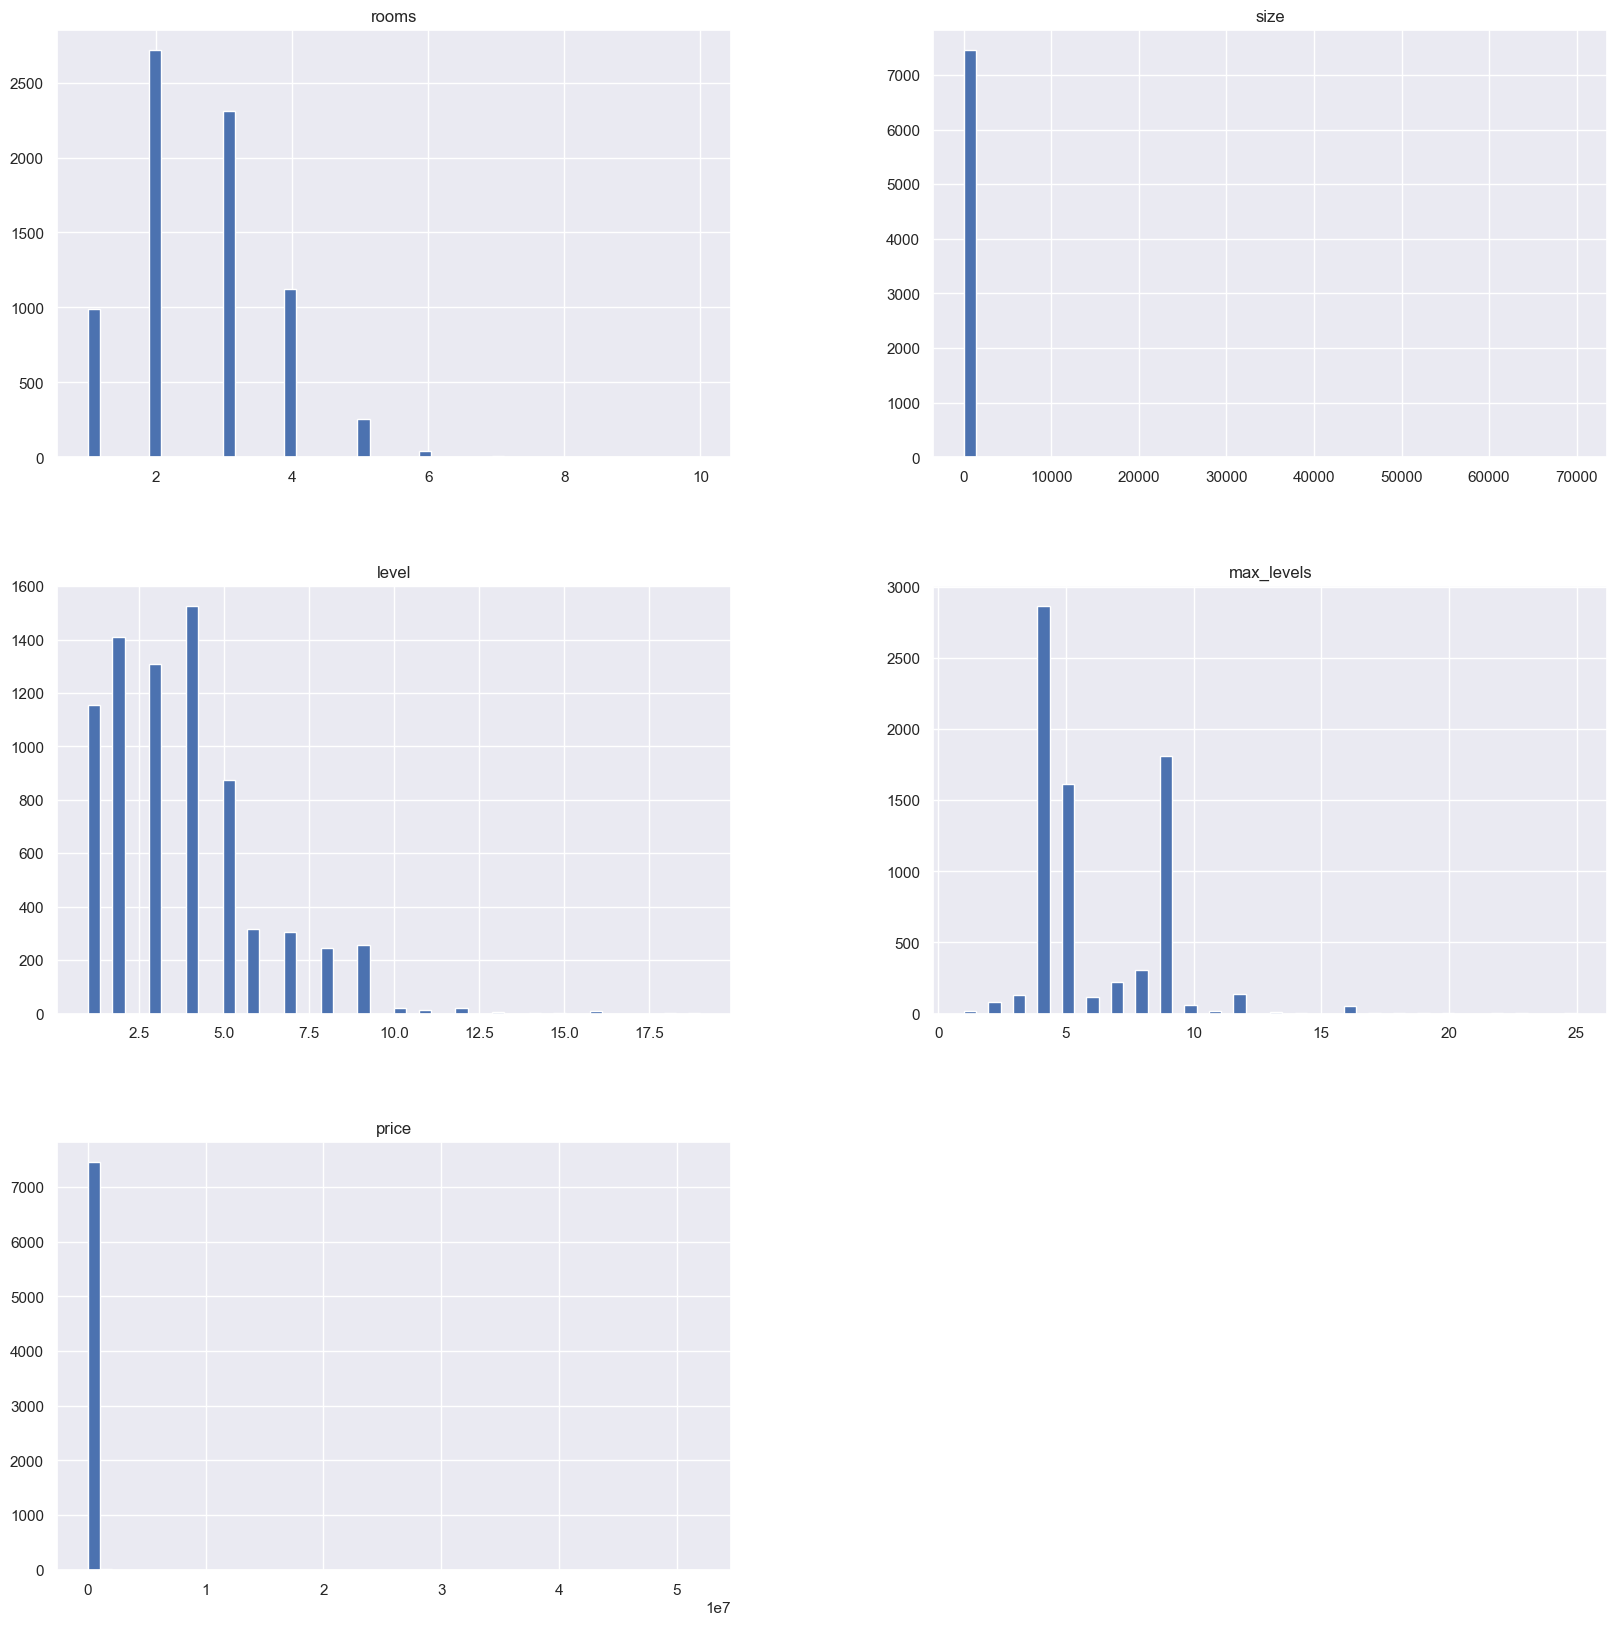

In [132]:
raw_data.hist(figsize=(20,20), bins=50)

plt.show()

### 'Size' hamda 'Price' ustunlarida noodatiy qiymatlar mavjud ularni to'g'irlash yoki tashlab yuborish kerak

In [133]:
raw_data[raw_data['size'] > 500].sort_values(by = 'size', ascending=False)

,district,rooms,size,level,max_levels,price
2547,Юнусабадский,3,70000.0,2,4,76000.0
4615,Олмазорский,4,69000.0,3,4,69000.0
5456,Мирзо-Улугбекский,3,67000.0,2,5,67000.0
3089,Мирзо-Улугбекский,2,44000.0,3,4,44000.0
2268,Мирзо-Улугбекский,1,24500.0,2,5,24500.0
7043,Олмазорский,4,7407.0,4,4,44000.0
981,Мирабадский,3,7359.0,2,4,46500.0
4784,Мирабадский,3,7359.0,2,4,46500.0
2662,Учтепинский,1,3448.0,5,5,25000.0
7421,Юнусабадский,8,2100.0,1,1,265000.0


In [134]:
idx = raw_data[raw_data['size'] > 10000].index

In [135]:
raw_data.loc[idx, 'size'] = raw_data['size'] / 1000

In [136]:
raw_data[raw_data['size'] > 2500]

,district,rooms,size,level,max_levels,price
981,Мирабадский,3,7359.0,2,4,46500.0
2662,Учтепинский,1,3448.0,5,5,25000.0
4784,Мирабадский,3,7359.0,2,4,46500.0
7043,Олмазорский,4,7407.0,4,4,44000.0


In [137]:
raw_data.loc[raw_data[raw_data['size'] > 2500].index, 'size'] = raw_data['size'] / 100

In [138]:
raw_data

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
...,...,...,...,...,...,...
7560,Яшнободский,1,38.0,5,5,24500.0
7561,Яшнободский,2,49.0,1,4,32000.0
7562,Шайхантахурский,2,64.0,3,9,40000.0
7563,Мирзо-Улугбекский,1,18.0,1,4,11000.0


In [139]:
raw_data[(raw_data['price'] < 10000) & (raw_data['size'] > 20)].sort_values(by = 'price')

,district,rooms,size,level,max_levels,price
7224,Учтепинский,2,51.0,2,4,2.0
273,Яккасарайский,3,100.0,3,4,1000.0
5719,Шайхантахурский,7,230.0,2,5,1000.0
4089,Шайхантахурский,6,500.0,2,2,1800.0
1827,Мирзо-Улугбекский,6,400.0,1,2,2000.0
3832,Яккасарайский,4,170.0,2,6,2000.0
7333,Мирзо-Улугбекский,1,30.0,2,4,2400.0
5073,Сергелийский,2,54.0,7,7,2864.0


### Bu qatorlarning aniq qiymatini aniqlash qiyin (agar expert yoki qayta surov o'tkazish iloji bo'lmaganda) shuning uchun ushbu qatorlarni tashlab yuboramiz

In [140]:
ind_price = raw_data[(raw_data['price'] < 10000) & (raw_data['size'] > 20)].sort_values(by = 'price').index
ind_price

Int64Index([7224, 273, 5719, 4089, 1827, 3832, 7333, 5073], dtype='int64')

In [141]:
raw_data.drop(ind_price, axis=0, inplace=True)

In [142]:
raw_data[(raw_data['price'] < 10000) & (raw_data['size'] > 20)].sort_values(by = 'price')

,district,rooms,size,level,max_levels,price


In [143]:
raw_data.describe(include= 'all').round(3).astype(str)

,district,rooms,size,level,max_levels,price
count,7457,7457.0,7457.0,7457.0,7457.0,7457.0
unique,12,nan,nan,nan,nan,nan
top,Чиланзарский,nan,nan,nan,nan,nan
freq,1631,nan,nan,nan,nan,nan
mean,nan,2.621,73.284,3.695,6.026,71398.438
std,nan,1.081,43.847,2.237,2.607,640905.431
min,nan,1.0,1.0,1.0,1.0,7300.0
25%,nan,2.0,50.0,2.0,4.0,35000.0
50%,nan,3.0,65.0,3.0,5.0,46500.0
75%,nan,3.0,85.0,5.0,9.0,67000.0


In [144]:
raw_data.sort_values('price', ascending=False).head(20)

,district,rooms,size,level,max_levels,price
5903,Учтепинский,4,72.0,2,5,52000000.0
6952,Шайхантахурский,3,114.0,5,7,15504000.0
7081,Чиланзарский,2,85.0,2,3,6630000.0
7296,Яшнободский,4,96.0,2,5,5568000.0
6517,Юнусабадский,3,80.0,8,9,4240000.0
1744,Олмазорский,3,84.0,1,5,3780000.0
330,Яшнободский,2,68.0,5,8,1666000.0
7466,Чиланзарский,2,42.0,1,3,1470000.0
6133,Юнусабадский,3,42.0,3,4,1344000.0
1695,Мирабадский,10,456.0,3,7,800000.0


In [145]:
raw_data[(raw_data['price'] > 1000000)]

,district,rooms,size,level,max_levels,price
330,Яшнободский,2,68.0,5,8,1666000.0
1744,Олмазорский,3,84.0,1,5,3780000.0
5903,Учтепинский,4,72.0,2,5,52000000.0
6133,Юнусабадский,3,42.0,3,4,1344000.0
6517,Юнусабадский,3,80.0,8,9,4240000.0
6952,Шайхантахурский,3,114.0,5,7,15504000.0
7081,Чиланзарский,2,85.0,2,3,6630000.0
7296,Яшнободский,4,96.0,2,5,5568000.0
7466,Чиланзарский,2,42.0,1,3,1470000.0


### Aksariyat uylar narxi dollarda berilganligi uchun bunday qiymatlar ham noodatiy

In [146]:
raw_data.loc[330, 'price'] = raw_data.at[330, 'price'] / 100
raw_data.loc[1744, 'price'] = raw_data.at[1744, 'price'] / 100
raw_data.loc[5903, 'price'] = raw_data.at[5903, 'price'] / 1000
raw_data.loc[6133, 'price'] = raw_data.at[6133, 'price'] / 100
raw_data.loc[6517, 'price'] = raw_data.at[6517, 'price'] / 100
raw_data.loc[6952, 'price'] = raw_data.at[6952, 'price'] / 100
raw_data.loc[7081, 'price'] = raw_data.at[7081, 'price'] / 100
raw_data.loc[7296, 'price'] = raw_data.at[7296, 'price'] / 100
raw_data.loc[7466, 'price'] = raw_data.at[7466, 'price'] / 100

In [147]:
raw_data[(raw_data['price'] > 1000000)]

,district,rooms,size,level,max_levels,price


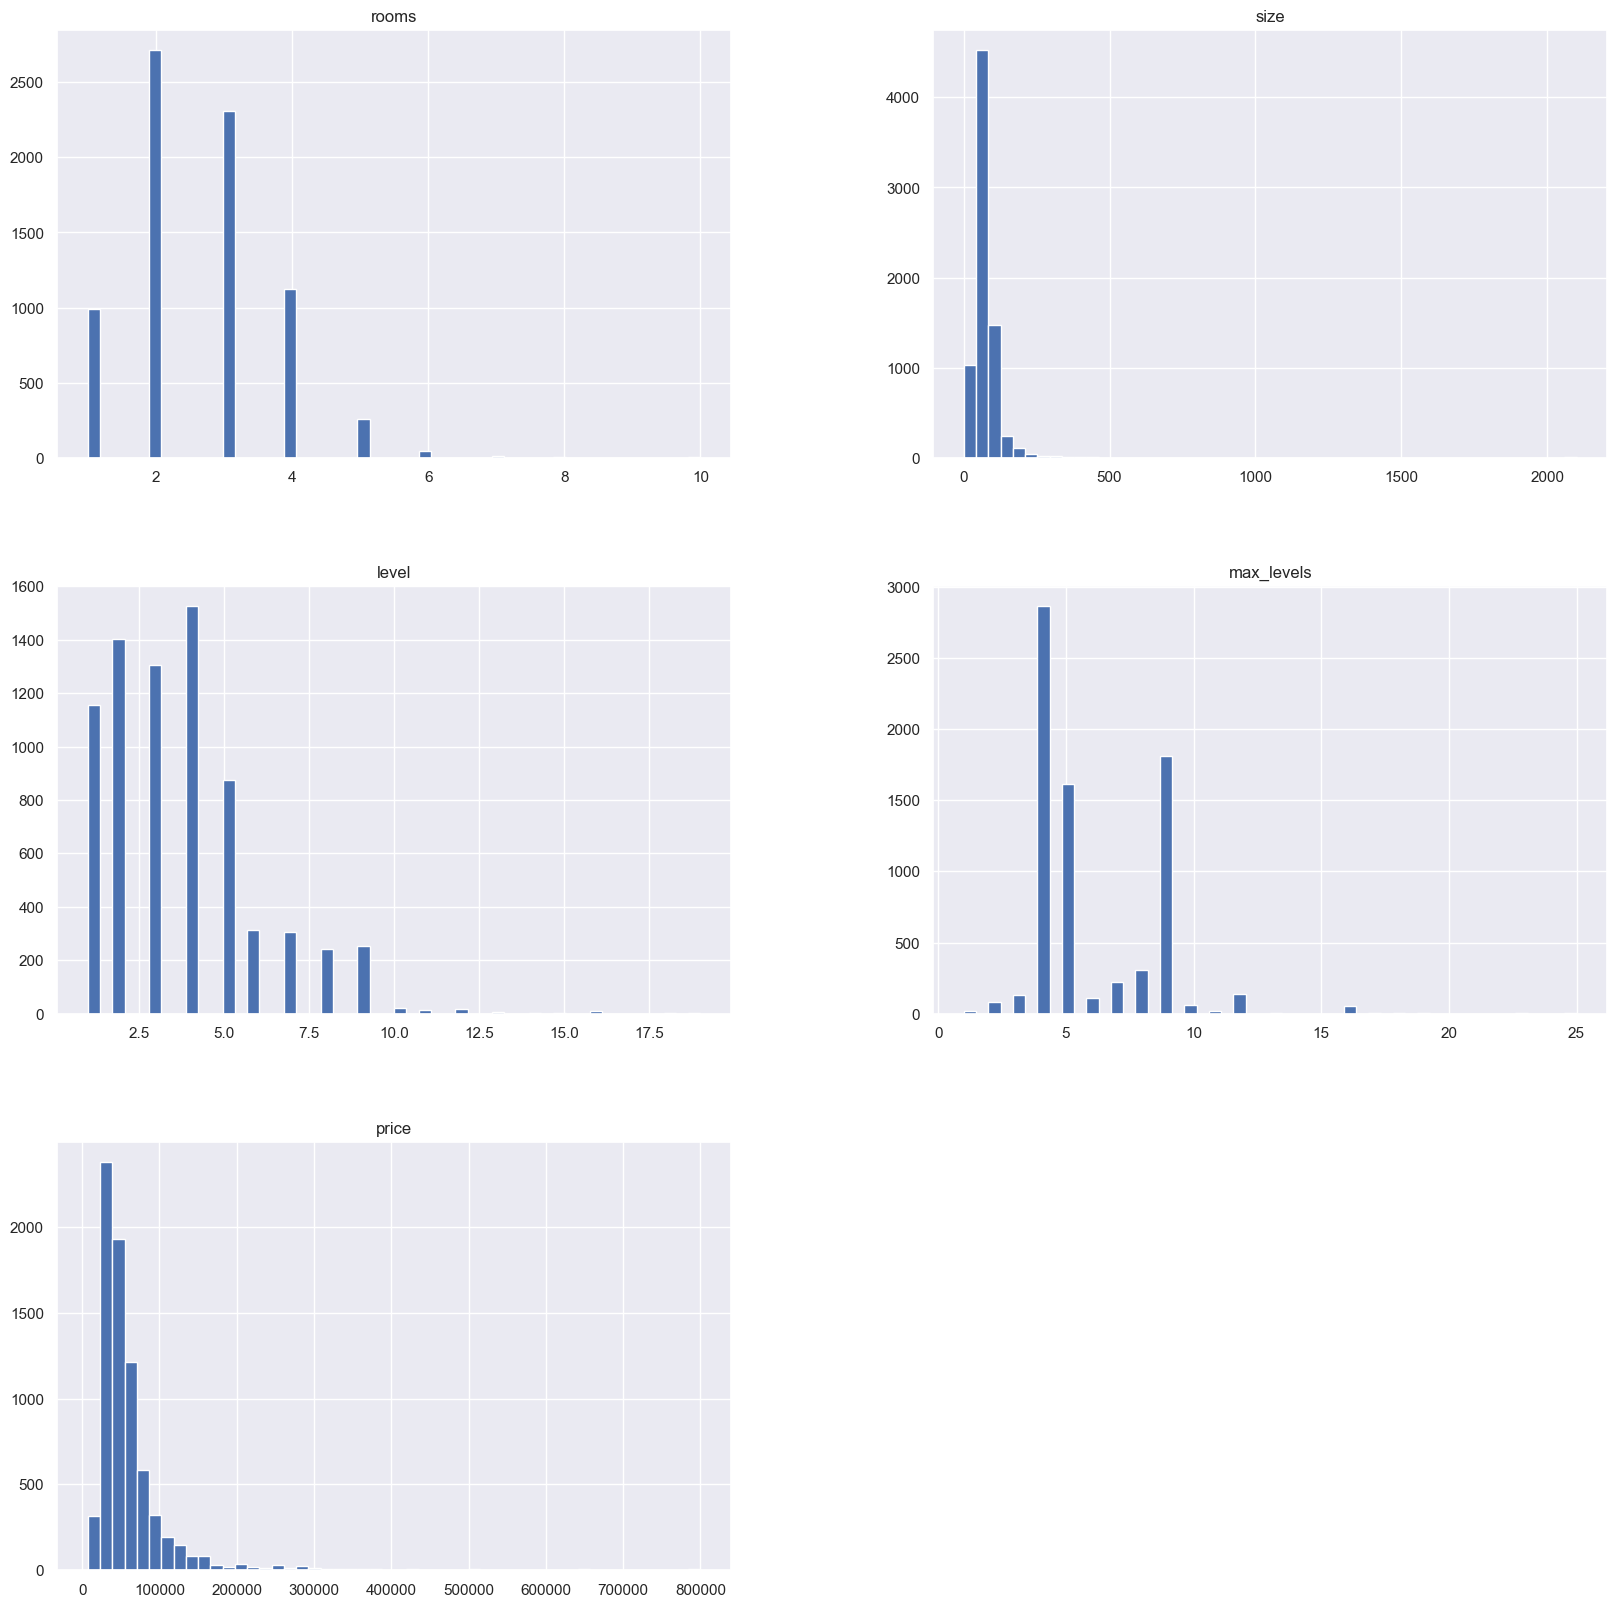

In [148]:
raw_data.hist(figsize=(20,20), bins=50)

plt.show()

In [149]:
raw_data

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
...,...,...,...,...,...,...
7560,Яшнободский,1,38.0,5,5,24500.0
7561,Яшнободский,2,49.0,1,4,32000.0
7562,Шайхантахурский,2,64.0,3,9,40000.0
7563,Мирзо-Улугбекский,1,18.0,1,4,11000.0


In [150]:
data = raw_data.copy()

### Train va Test setlarga ajratamiz 'district' ustunda balansni saqlagan holatda

#### 'district' ustunida balansni ushlash uchub 'Cat ustunini qo'shamiz

In [151]:
from sklearn.preprocessing import OrdinalEncoder

In [152]:
ordinal = OrdinalEncoder()
ordinal.fit_transform(data[['district']])

array([[8.],
       [9.],
       [6.],
       ...,
       [7.],
       [2.],
       [6.]])

In [153]:
data['Cat'] = ordinal.fit_transform(data[['district']])

In [154]:
data.head()

,district,rooms,size,level,max_levels,price,Cat
0,Юнусабадский,3,57.0,4,4,52000.0,8.0
1,Яккасарайский,2,52.0,4,5,56000.0,9.0
2,Чиланзарский,2,42.0,4,4,37000.0,6.0
3,Чиланзарский,3,65.0,1,4,49500.0,6.0
4,Чиланзарский,3,70.0,3,5,55000.0,6.0


In [155]:
data_with_dummy = pd.get_dummies(data, prefix='', prefix_sep='')

In [156]:
from sklearn.model_selection import StratifiedShuffleSplit

strat = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=73)

In [157]:
data_with_dummy.reset_index(drop=True, inplace=True)

In [158]:
for train_ind, test_ind in strat.split(data_with_dummy, data_with_dummy['Cat']):
    train_set = data_with_dummy.loc[train_ind]
    test_set = data_with_dummy.loc[test_ind]

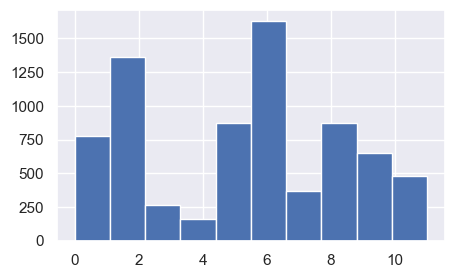

In [159]:
plt.figure(figsize=(5,3))
data.Cat.hist()
plt.show()

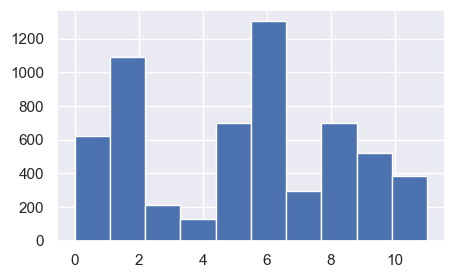

In [160]:
plt.figure(figsize=(5,3))
train_set.Cat.hist()
plt.show()

#### Cat ustunni tashlab yuboramiz sababi endi kerak emas

In [161]:
train_set.drop('Cat', axis=1, inplace=True)
test_set.drop('Cat', axis=1, inplace=True)

In [162]:
train_set

,rooms,size,level,max_levels,price,Бектемирский,Мирабадский,Мирзо-Улугбекский,Олмазорский,Сергелийский,Учтепинский,Чиланзарский,Шайхантахурский,Юнусабадский,Яккасарайский,Янгихаётский,Яшнободский
2032,2,42.0,2,4,32500.0,0,0,0,0,0,0,1,0,0,0,0,0
1129,3,78.0,3,9,45000.0,0,0,0,0,0,1,0,0,0,0,0,0
5026,3,70.0,4,5,52500.0,0,0,1,0,0,0,0,0,0,0,0,0
690,3,75.0,10,12,50000.0,0,0,0,0,0,0,0,1,0,0,0,0
2365,1,42.0,4,5,22800.0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3755,1,41.0,1,4,30000.0,0,0,0,0,0,0,0,0,1,0,0,0
3954,3,60.0,3,4,75000.0,0,0,0,0,0,0,0,0,1,0,0,0
1334,2,54.0,5,5,36000.0,0,0,0,0,0,0,1,0,0,0,0,0
4727,1,42.0,2,9,37000.0,0,1,0,0,0,0,0,0,0,0,0,0


## 1. Linear Regression da sinab ko'ramiz

In [163]:
from sklearn.linear_model import LinearRegression
reg_linear = LinearRegression()

In [164]:
Y_train = train_set.price
X_train = train_set.drop('price', axis=1)

In [165]:
reg_linear.fit(X_train, Y_train)

LinearRegression()

In [166]:
pred = reg_linear.predict(X_train)

In [167]:
diff = pd.DataFrame()
diff['Asl_price'] = Y_train
diff['Pred'] = pred
diff['Diff'] = Y_train - pred
diff['Diff $'] = ((Y_train - pred) / Y_train) * 100

In [168]:
diff.head(35)

,Asl_price,Pred,Diff,Diff $
2032,32500.0,34620.440169,-2120.440169,-6.524431
1129,45000.0,62257.897228,-17257.897228,-38.350883
5026,52500.0,59155.055612,-6655.055612,-12.676296
690,50000.0,58578.698941,-8578.698941,-17.157398
2365,22800.0,14359.369853,8440.630147,37.020308
6248,40500.0,51989.778660,-11489.778660,-28.369824
717,34600.0,44499.843494,-9899.843494,-28.612264
4952,72000.0,108570.658757,-36570.658757,-50.792582
4244,38500.0,45588.452463,-7088.452463,-18.411565
3827,23000.0,51883.604255,-28883.604255,-125.580888


In [169]:
diff.describe().round(2).astype(str)

,Asl_price,Pred,Diff,Diff $
count,5965.0,5965.0,5965.0,5965.0
mean,59062.21,59062.21,-0.0,-9.22
std,47392.38,34034.89,32979.75,34.83
min,7300.0,-4685.91,-862050.61,-446.7
25%,35000.0,38646.64,-12466.29,-28.13
50%,46000.0,53070.32,-3197.89,-7.04
75%,66000.0,72872.26,5797.98,13.0
max,800000.0,1127050.61,628327.45,130.23


#### Accuracy ni hisoblasak

In [170]:
reg_linear.score(X_train, Y_train)

0.5157410007485552

In [171]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [172]:
mae = mean_absolute_error(Y_train, pred)
# -----------------------------------------
mse = mean_squared_error(Y_train, pred)
print('MAE : ', mae.round(2), '\nMSE : ', np.sqrt(mse).round(2))

MAE :  15971.35 
MSE :  32976.99


#### Natijalar yaxshi bo'lmasa ham test setni tekshirib olamiz

In [173]:
Y_test = test_set.price
X_test = test_set.drop('price', axis=1)

In [174]:
X_test_linear_pred = reg_linear.predict(X_test)
X_test_linear_pred

array([ 30743.80985647, 116351.97528376,  81325.36192004, ...,
        89335.74207426, 125329.17307323,  48607.38593311])

In [175]:
from sklearn.metrics import r2_score

r2_train_lr = r2_score(Y_train, pred)
r2_test_lr = r2_score(Y_test, X_test_linear_pred)

pd.DataFrame({'Accurancy' : [r2_train_lr, r2_test_lr]}, index= ['Train_set', 'Test_set'])

,Accurancy
Train_set,0.515741
Test_set,0.599275


## 2. Random Forest Regressionda sinab ko'ramiz

In [176]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)

RandomForestRegressor()

In [177]:
pred_rf = rf_model.predict(X_train)

In [178]:
diff_rf = pd.DataFrame()
diff_rf['Asl_price'] = Y_train
diff_rf['Pred'] = pred_rf
diff_rf['Diff'] = Y_train - pred_rf
diff_rf['Diff %'] = ((Y_train - pred_rf) / Y_train) * 100

In [179]:
diff_rf.describe()

,Asl_price,Pred,Diff,Diff %
count,5965.000000,5965.000000,5965.000000,5965.000000
mean,59062.208718,59303.392835,-241.184118,-2.776429
std,47392.382322,44657.819133,10445.924523,16.876518
min,7300.000000,8543.950000,-124217.163333,-528.583674
25%,35000.000000,36126.761556,-2988.690476,-6.880433
50%,46000.000000,47651.964286,-369.633333,-0.864037
75%,66000.000000,65725.873333,1937.333333,3.637371
max,800000.000000,743200.000000,345189.528486,82.187983


In [180]:
mae = mean_absolute_error(Y_train, pred_rf)
# -----------------------------------------
mse = mean_squared_error(Y_train, pred_rf)
print('MAE : ', mae.round(2), '\nMSE : ', np.sqrt(mse).round(2))

MAE :  5031.25 
MSE :  10447.83


#### 'Diff' hamda 'Dif %' ustunlari oradagi farqni yani xatolikni ko'rsatayotganligi uchun ularning absalyut qiymatini olsak ham bo'ladi

In [181]:
diff_rf = abs(diff_rf)

In [182]:
diff_sorted_by_per = diff_rf.sort_values('Diff %', ascending=False)
diff_sorted_by_per

,Asl_price,Pred,Diff,Diff %
1282,23500.0,147717.163333,124217.163333,528.583674
1503,22000.0,129168.900000,107168.900000,487.131364
2763,15000.0,64495.000000,49495.000000,329.966667
861,23999.0,73504.360000,49505.360000,206.280928
7264,26500.0,75090.000000,48590.000000,183.358491
...,...,...,...,...
2671,33500.0,33500.000000,0.000000,0.000000
5456,56000.0,56000.000000,0.000000,0.000000
4350,23000.0,23000.000000,0.000000,0.000000
5096,56000.0,56000.000000,0.000000,0.000000


#### 10%, 20%, 30% xatolikdan ko'p qiymatlar sonini aniqlaymiz

In [86]:
# print orqali funcsiya yasaymiz bizga bu shunchakl ma'lumot chop etadi

def xatolik(x, Data, Data_ustuni_nomeri):
    x_size = Data[Data.iloc[:, Data_ustuni_nomeri] > x].shape[0]
    text_x = f"""{x}% dan yuqori xatoliklar soni: {str(x_size)} | Shuningdek % da: {str(round((x_size / len(Data) * 100),2))}%"""
    print(text_x)
    

In [87]:
xatolik(10, diff_sorted_by_per, 3)
xatolik(20, diff_sorted_by_per, 3)
xatolik(30, diff_sorted_by_per, 3)

10% dan yuqori xatoliklar soni: 1682 | Shuningdek % da: 28.2%
20% dan yuqori xatoliklar soni: 560 | Shuningdek % da: 9.39%
30% dan yuqori xatoliklar soni: 244 | Shuningdek % da: 4.09%


#### Umumiy xatoliklarni barplot ko'rinishida ko'rsak ham bo'ladi

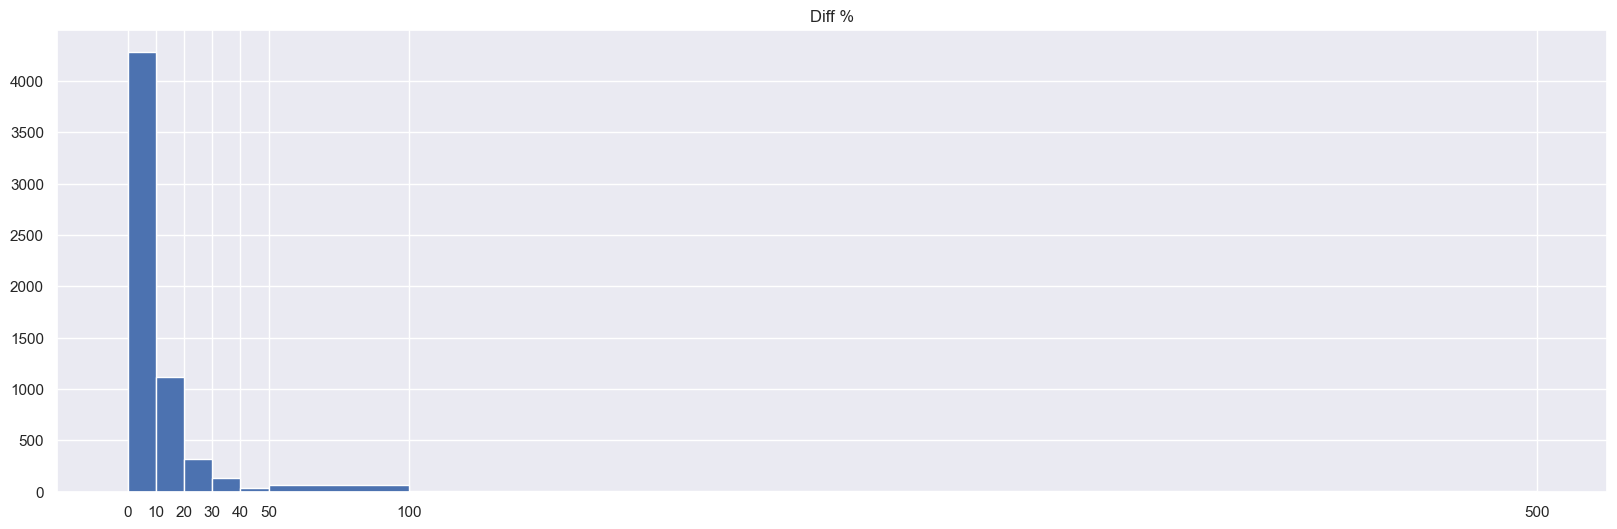

In [88]:
diff_rf.hist('Diff %', bins = [0,10,20,30,40,50,100, 500])
plt.xticks([0,10,20,30,40,50,100, 500])

plt.show()

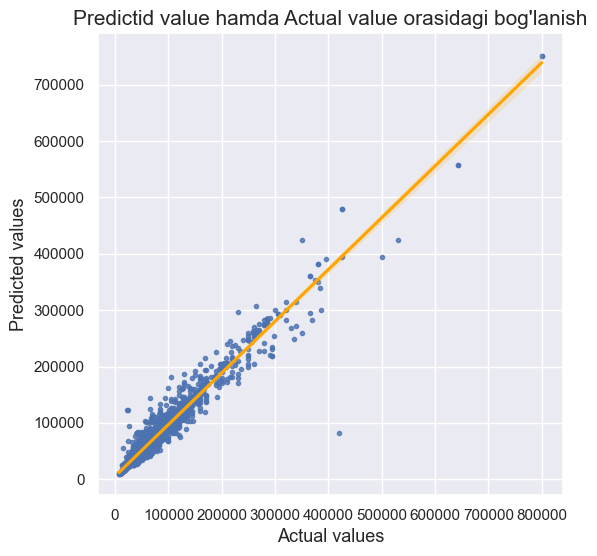

In [89]:
sns.set(rc={'figure.figsize':(6,6)})

sns.regplot(x = diff_rf.Asl_price, y =diff_rf.Pred, marker='.', line_kws={'color' : 'Orange'})
plt.title('Predictid value hamda Actual value orasidagi bog\'lanish', fontdict={'size' : 15})
plt.xlabel('Actual values', fontdict={'size' : 13})
plt.ylabel('Predicted values', fontdict={'size' : 13})

plt.show()

### Train set uchun Accuracy ni hisoblaymiz va Test set orqali test qilib ko'ramiz

In [90]:
rf_model.score(X_train, Y_train)

0.9500245378538575

#### Aniqlik yuqori darajada ana endi test qilib ko'ramiz

In [91]:
test_set.head()

,rooms,size,level,max_levels,price,Бектемирский,Мирабадский,Мирзо-Улугбекский,Олмазорский,Сергелийский,Учтепинский,Чиланзарский,Шайхантахурский,Юнусабадский,Яккасарайский,Янгихаётский,Яшнободский
7224,1,45.0,2,4,49000.0,0,0,0,0,0,0,0,0,1,0,0,0
6589,5,188.0,3,4,70000.0,0,0,0,0,1,0,0,0,0,0,0,0
5051,3,75.0,8,9,76000.0,0,1,0,0,0,0,0,0,0,0,0,0
5913,1,43.0,4,4,62000.0,0,0,1,0,0,0,0,0,0,0,0,0
685,4,100.0,9,9,70000.0,0,1,0,0,0,0,0,0,0,0,0,0


In [92]:
pred_test_set = rf_model.predict(X_test)
pred_test_set

array([ 36759.67      , 157330.        ,  71134.52380952, ...,
        85511.66666667, 118436.64666667,  44035.08928571])

In [93]:
diff_rf_test = pd.DataFrame()
diff_rf_test['Asl_price'] = Y_test
diff_rf_test['Pred'] = pred_test_set
diff_rf_test['Diff'] = Y_test - pred_test_set
diff_rf_test['Diff %'] = ((Y_test - pred_test_set) / Y_test) * 100

In [94]:
diff_rf_test = abs(diff_rf_test)

In [95]:
diff_sorted_test = diff_rf_test.sort_values('Diff %', ascending=False)
diff_sorted_test

,Asl_price,Pred,Diff,Diff %
4347,48000.0,242625.00,194625.00,405.468750
1674,130000.0,570196.00,440196.00,338.612308
3754,54000.0,235042.49,181042.49,335.263870
1126,30500.0,122935.90,92435.90,303.068525
2343,26500.0,93663.00,67163.00,253.445283
...,...,...,...,...
4458,23000.0,23000.00,0.00,0.000000
4454,23000.0,23000.00,0.00,0.000000
200,48000.0,48000.00,0.00,0.000000
4392,23000.0,23000.00,0.00,0.000000


In [96]:
xatolik(10, diff_sorted_test, 3)
xatolik(20, diff_sorted_test, 3)
xatolik(30, diff_sorted_test, 3)

10% dan yuqori xatoliklar soni: 777 | Shuningdek % da: 52.08%
20% dan yuqori xatoliklar soni: 432 | Shuningdek % da: 28.95%
30% dan yuqori xatoliklar soni: 232 | Shuningdek % da: 15.55%


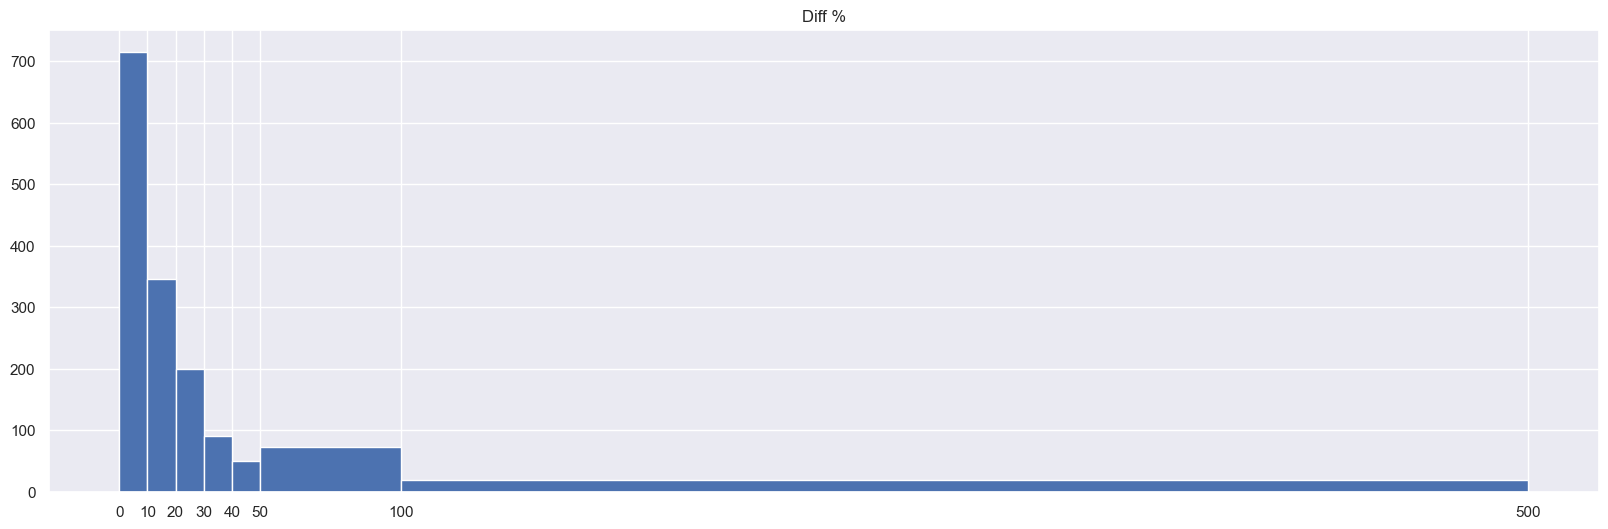

In [97]:
sns.set(rc={'figure.figsize':(20,6)})

diff_sorted_test.hist('Diff %', bins = [0,10,20,30,40,50,100, 500])
plt.xticks([0,10,20,30,40,50,100, 500])

plt.show()

In [98]:
mae = mean_absolute_error(Y_test, pred_test_set)
# -----------------------------------------
mse = mean_squared_error(Y_test, pred_test_set)
print('MAE : ', mae.round(2), '\nMSE : ', np.sqrt(mse).round(2))

MAE :  10633.11 
MSE :  23445.84


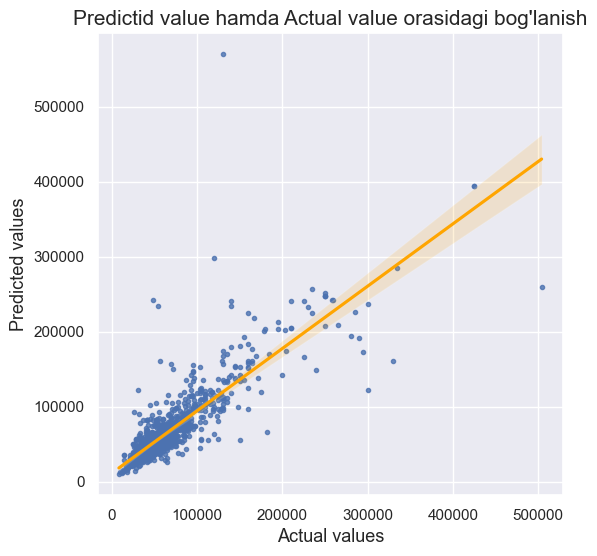

In [99]:
sns.set(rc={'figure.figsize':(6,6)})

sns.regplot(x = diff_rf_test.Asl_price, y =diff_rf_test.Pred, marker='.', line_kws={'color' : 'Orange'})
plt.title('Predictid value hamda Actual value orasidagi bog\'lanish', fontdict={'size' : 15})
plt.xlabel('Actual values', fontdict={'size' : 13})
plt.ylabel('Predicted values', fontdict={'size' : 13})

plt.show()

## Tain va Test setlar uchun model aniqligini ko'ramiz

In [100]:
r2_train = r2_score(Y_train, pred_rf)
r2_test = r2_score(Y_test, pred_test_set)

pd.DataFrame({'Accurancy' : [r2_train, r2_test]}, index= ['Train_set', 'Test_set'])

,Accurancy
Train_set,0.950025
Test_set,0.716966


## Xulosa shundaki ushbu muammo uchun bizda Random Forest Regression ko'proq aniqlik bermoqda.